In [37]:
from arty.core.color import visualize_color_set
from arty.sbr.preset import Preset, PresetAdv
from arty.sbr.image_painter import ImagePainter, IrregularBrushImagePainter
import cv2
import matplotlib.pyplot as plt

# Single-point stroke algorithm
## Multi-layer

In [33]:
preset = Preset(
                stroke_scale=1,
                layer_scales = [8, 4, 2],
                gradient_smoothing_radius=15,
                length_scale=1/5,
                brush_type="ellipse",
                gradient_type="sharr",
                gradient_smoothing_type="gaussian",
                smoothing_iterations=1,
                length_type="base",
                length_first_flag=True,
                grid_scale=3,
                grayscale=False,
                has_cardboard=False,
                palette_size=45,
)

sharr
Painting image with multiple layers...
Computing color set...
Extending color color set...
Computing gradient...
sharr gaussian 15 1
Painting layer 1 with stroke scale 8...


100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


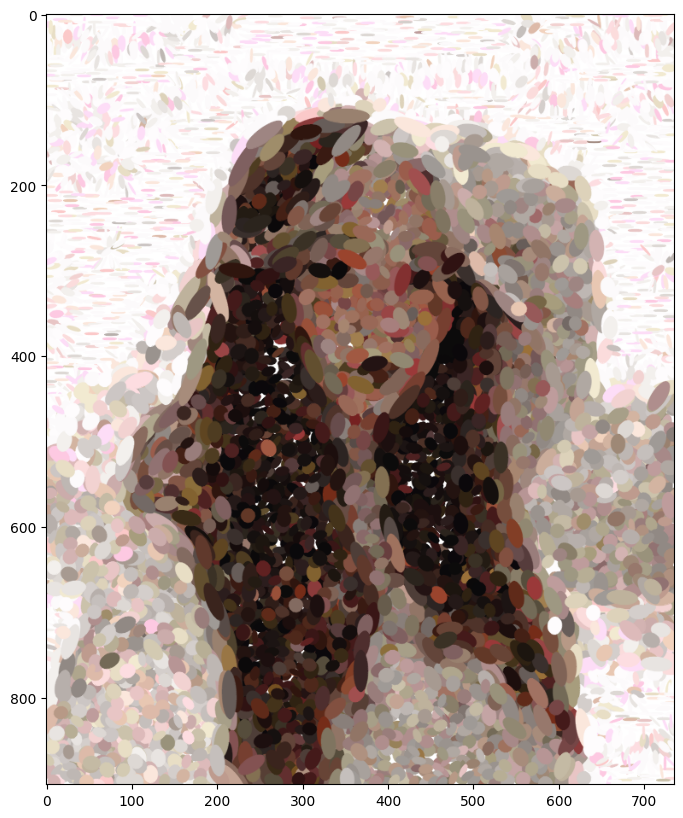

Painting layer 2 with stroke scale 4...


100%|██████████| 5/5 [00:00<00:00,  8.42it/s]


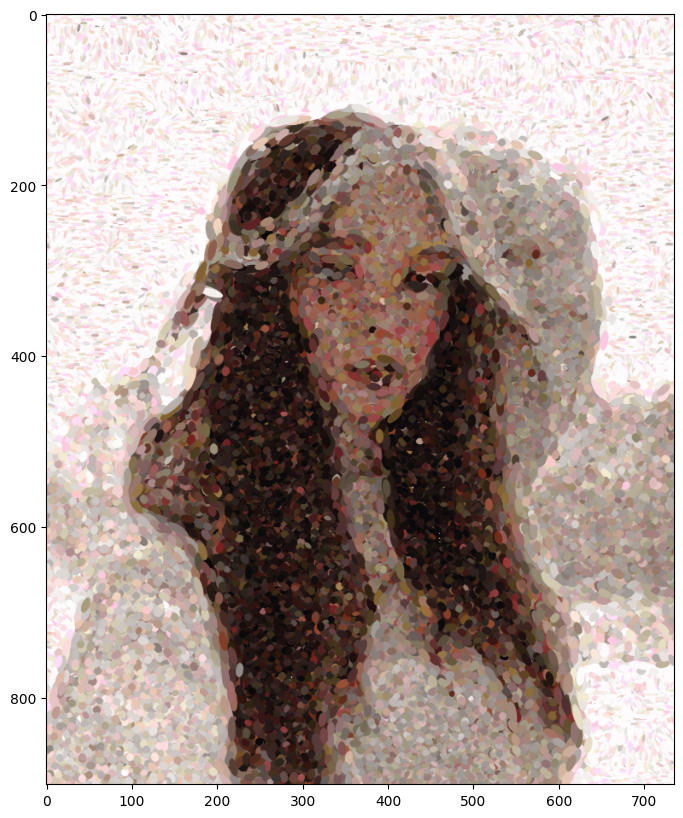

Painting layer 3 with stroke scale 2...


100%|██████████| 17/17 [00:02<00:00,  7.64it/s]


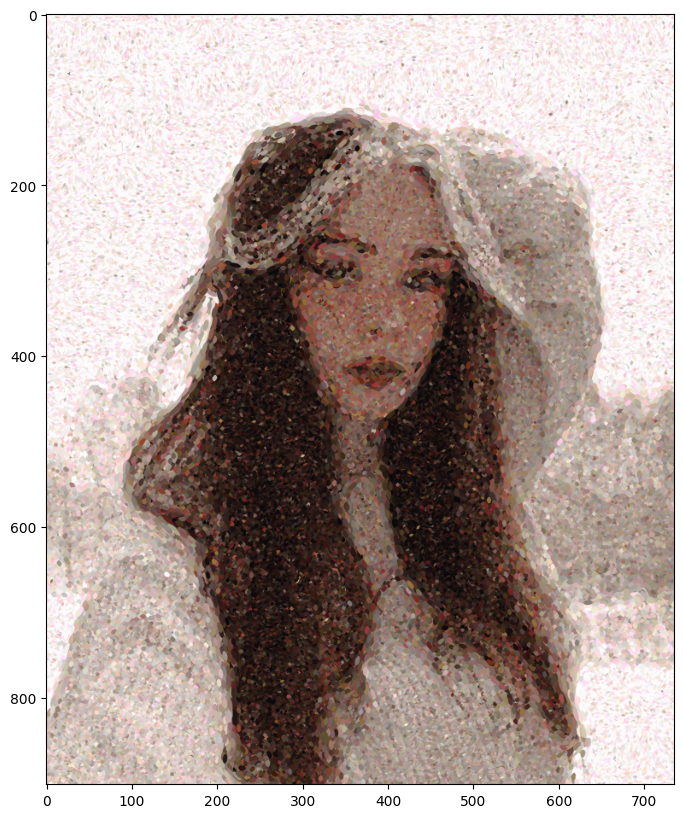

In [34]:
img = cv2.imread("images/img.png")

painter = ImagePainter(img, preset)
print(painter.preset.gradient_type)
result = painter.paint()

## The same, but with one layer

sharr
Painting image with multiple layers...
Computing color set...
Extending color color set...
Computing gradient...
sharr gaussian 15 1
Painting layer 1 with stroke scale 2...


100%|██████████| 17/17 [00:02<00:00,  7.53it/s]


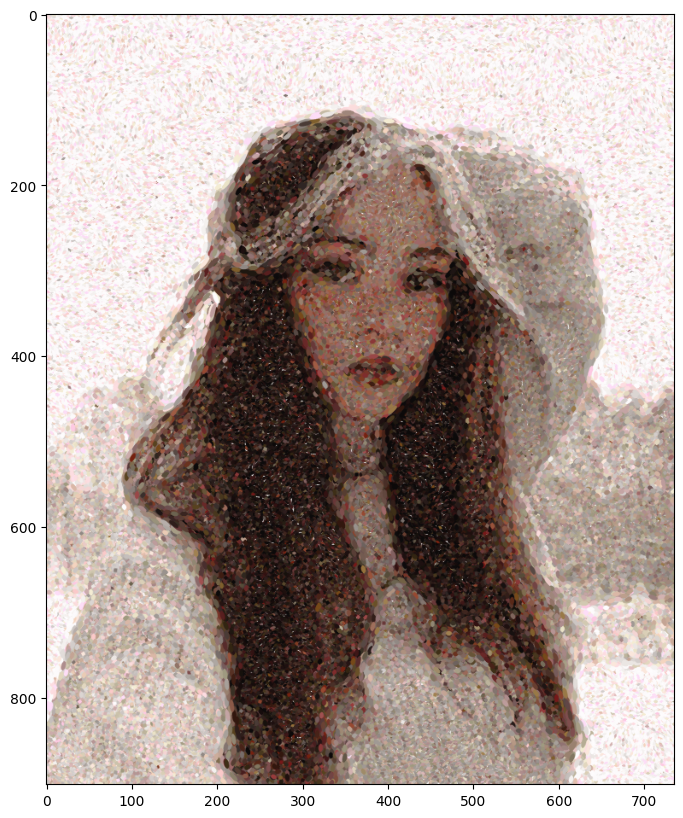

In [17]:
# preset1 = preset.copy()
preset.layer_scales = [2] 
painter1 = ImagePainter(img, preset)
print(painter1.preset.gradient_type)
result1 = painter1.paint()

##  VIsualization of color set

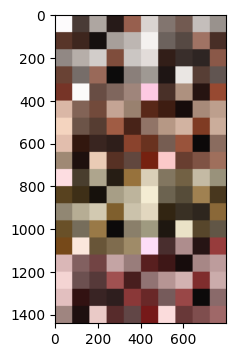

array([[[252, 251, 253],
        [252, 251, 253],
        [252, 251, 253],
        ...,
        [141, 146, 153],
        [141, 146, 153],
        [141, 146, 153]],

       [[252, 251, 253],
        [252, 251, 253],
        [252, 251, 253],
        ...,
        [141, 146, 153],
        [141, 146, 153],
        [141, 146, 153]],

       [[252, 251, 253],
        [252, 251, 253],
        [252, 251, 253],
        ...,
        [141, 146, 153],
        [141, 146, 153],
        [141, 146, 153]],

       ...,

       [[128, 133, 159],
        [128, 133, 159],
        [128, 133, 159],
        ...,
        [104, 104, 159],
        [104, 104, 159],
        [104, 104, 159]],

       [[128, 133, 159],
        [128, 133, 159],
        [128, 133, 159],
        ...,
        [104, 104, 159],
        [104, 104, 159],
        [104, 104, 159]],

       [[128, 133, 159],
        [128, 133, 159],
        [128, 133, 159],
        ...,
        [104, 104, 159],
        [104, 104, 159],
        [104, 104, 159]]

In [36]:
visualize_color_set(painter1.color_set)

# Irregular brush algorithm

In [30]:
preset = Preset(
                stroke_scale=5,
                gradient_smoothing_radius=15,
                length_scale=1/4,
                brush_type="ellipse",
                gradient_type="sharr",
                gradient_smoothing_type="none",
                smoothing_iterations=1,
                length_type="base",
                length_first_flag=True,
                grid_scale=3,
                grayscale=False,
                has_cardboard=False,
                palette_size=45,
)
        

preset_adv = PresetAdv(brush_sizes = [16, 8, 4])

Smoothing:  none
sharr
Computing gradient...
sharr none 15 1
Painting with multiple layers...
Computing gradient...
luminance
sharr none 15 1
Painting layer 1 with brush size 16...


100%|██████████| 350/350 [00:00<00:00, 697.55it/s]


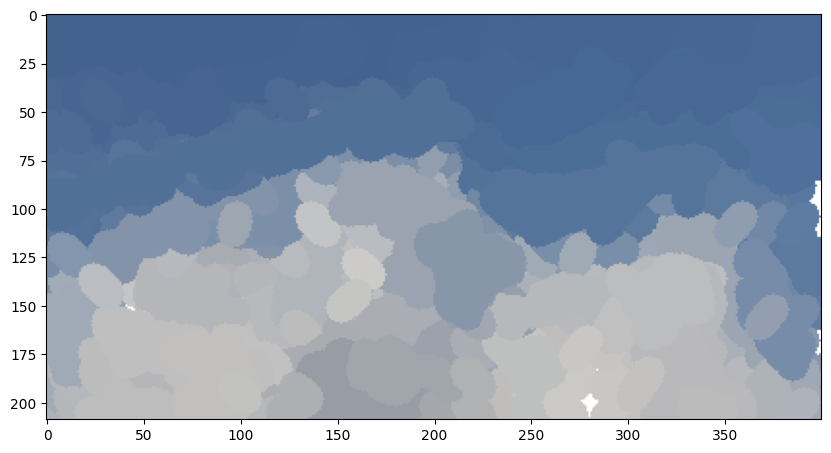

Painting layer 2 with brush size 8...


100%|██████████| 1350/1350 [00:03<00:00, 428.35it/s]


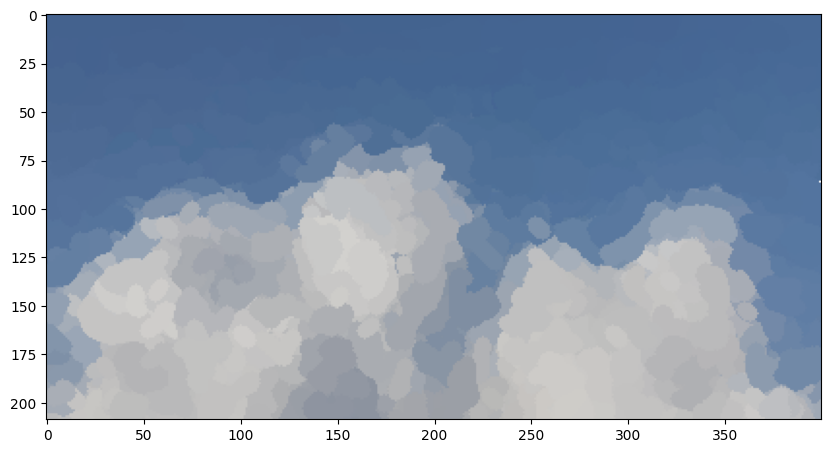

Painting layer 3 with brush size 4...


100%|██████████| 5300/5300 [00:13<00:00, 396.58it/s]


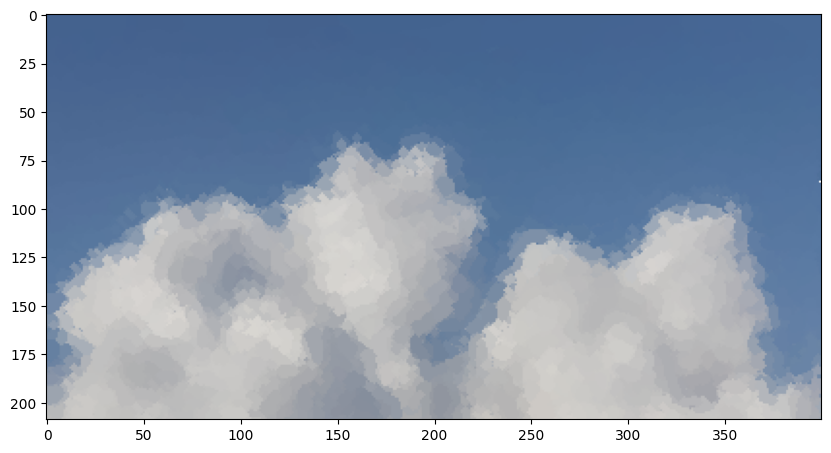

In [31]:
image = cv2.imread("../_demo/images/img_6.png")
# mask = cv2.imread("../_demo/images/mask1.png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (image.shape[1]//3, image.shape[0]//3))
painter = IrregularBrushImagePainter(image, preset, preset_adv)
print(painter.preset.gradient_type)
painter.compute_gradient()
result2 = painter.paint()